- Import data to begin EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn_data.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


- #1-#8 can be used for feature engineering, if there is good correlation
- #9 is our target to predict 

In [5]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
df["InternetService"] = df["InternetService"].fillna("")

In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

The Dataset should now be cleaned up, with no more duplicates and NA values.

In [9]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
numeric_columns_data = df.select_dtypes(include=["int64", "float64"])

In [12]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


- TotalCharges and Tenure has positive correlation, and that makes sense due to time. No insight gained.
- Other features are not correlated.

In [13]:
import matplotlib.pyplot as plt

In [14]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

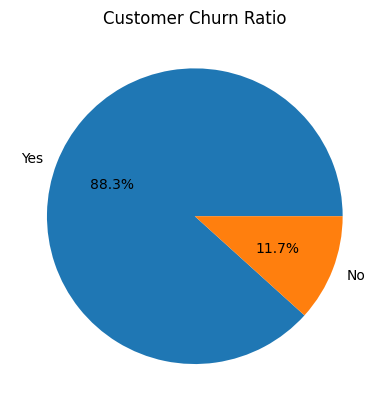

In [15]:
#Create a pie chart of churn
df["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Customer Churn Ratio")
plt.ylabel("")
plt.show()

- Most of the customers are churns in this dataset

In [16]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [18]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [19]:
df.groupby("ContractType")["MonthlyCharges"].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

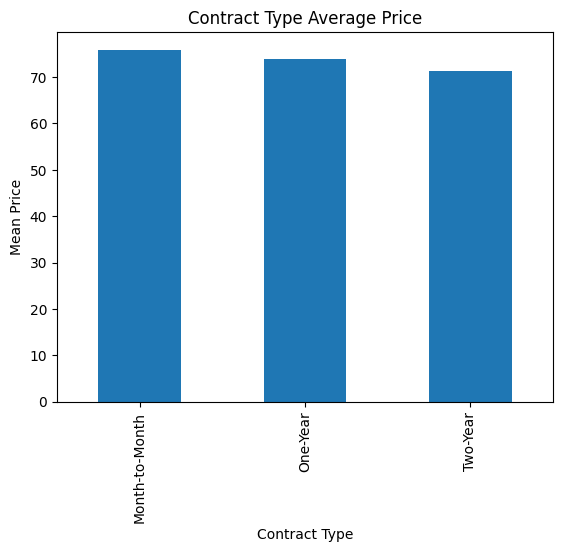

In [20]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

At the lower terms we can see that the monthly charge average decreases

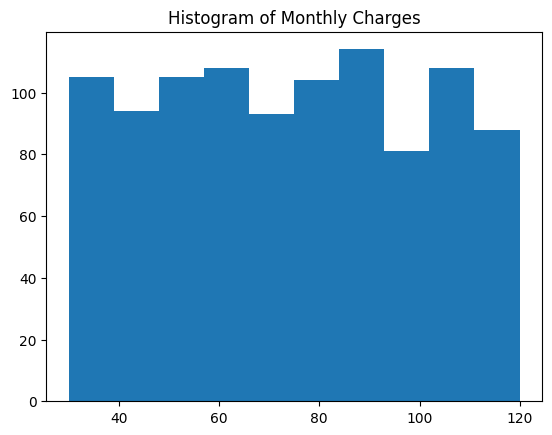

In [21]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

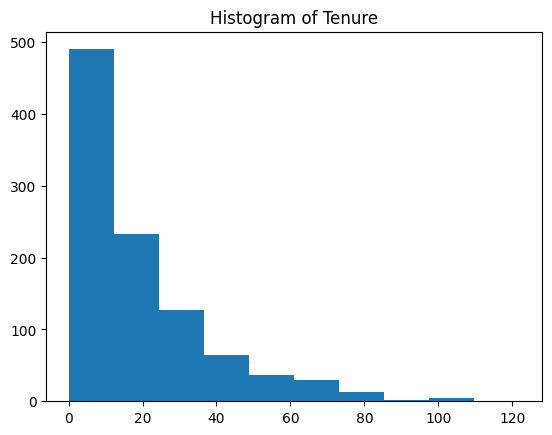

In [22]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [23]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [24]:
y = df[["Churn"]]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [25]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


It appears that I need to do some encoding before I train the data.

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
X['Gender'] = le.fit_transform(X['Gender'])

/var/folders/q8/12hwdh_n3h18rtx_9y5g8f4r0000gn/T/ipykernel_13892/3329108962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(X['Gender'])


In [28]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,1,4,88.35
1,43,1,0,36.67
2,51,0,2,63.79
3,60,0,8,102.34
4,42,1,32,69.01
...,...,...,...,...
995,42,1,41,37.14
996,62,1,9,80.93
997,51,0,15,111.72
998,39,1,68,65.67


In [29]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [30]:
y = le.fit_transform(y)

/Users/halchemy/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

Transformed dataset into trainable db. Feature set is now ready for machine learning.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [34]:
X_train = sc.fit_transform(X_train)

In [35]:
X_test = sc.fit_transform(X_test)

In [36]:
import joblib
joblib.dump(sc, "scaler.pkl")

['scaler.pkl']

What I did here was imported the scaler and saved the model into a pkl file

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def model_performance(predictions):
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy score for this model is {accuracy:.2f}")
    
    # Additional metrics
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    
    # Display metrics in a table format
    metrics = {
        "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
        "Score": [accuracy, precision, recall, f1]
    }
    metrics_df = pd.DataFrame(metrics)
    print(metrics_df)
    
    # Display confusion matrix
    print("\nConfusion Matrix:")
    print(cm)

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_model = LogisticRegression()

In [41]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = log_model.predict(X_test)

In [43]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1])

In [44]:
model_performance(y_pred)

Accuracy score for this model is 0.89
      Metric     Score
0   Accuracy  0.885000
1  Precision  0.888889
2     Recall  0.994350
3   F1 Score  0.938667

Confusion Matrix:
[[  1  22]
 [  1 176]]


The accuracy score is not bad from the logistic regression model. 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [47]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [48]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [49]:
gridkn.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

In [50]:
y_pred = gridkn.predict(X_test)

In [51]:
model_performance(y_pred)

Accuracy score for this model is 0.88
      Metric     Score
0   Accuracy  0.880000
1  Precision  0.888325
2     Recall  0.988701
3   F1 Score  0.935829

Confusion Matrix:
[[  1  22]
 [  2 175]]


In [52]:
from sklearn.svm import SVC

In [53]:
svm = SVC()

In [54]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [55]:
svc_grid = GridSearchCV(SVC(), param_grid, cv=5)

In [56]:
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [57]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [58]:
svc_grid.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [59]:
y_pred = svc_grid.predict(X_test)

In [60]:
model_performance(y_pred)

Accuracy score for this model is 0.89
      Metric     Score
0   Accuracy  0.885000
1  Precision  0.885000
2     Recall  1.000000
3   F1 Score  0.938992

Confusion Matrix:
[[  0  23]
 [  0 177]]


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10]
}

In [63]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [64]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'splitter': ['best', 'random']})

In [65]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [66]:
y=pred = grid_tree.predict(X_test)

In [67]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [68]:
model_performance(y_pred)

Accuracy score for this model is 0.89
      Metric     Score
0   Accuracy  0.885000
1  Precision  0.885000
2     Recall  1.000000
3   F1 Score  0.938992

Confusion Matrix:
[[  0  23]
 [  0 177]]
